### Text cleaning and preparation 

In [1]:
# https://realpython.com/working-with-files-in-python/#listing-all-files-in-a-directory

import os

# List all files in a directory using os.listdir
topics = ['Business', 'Entertainment', 'Politics','Sport', 'Tech']
bus = []
ent = []
pol = []
sport = []
tech = []
for topic in topics:
    basepath = str(topic)+'/'
    for entry in os.listdir(basepath):
        if os.path.isfile(os.path.join(basepath, entry)):
            if topic=='Business':
                bus.append(entry)
            elif topic=='Entertainment':
                ent.append(entry)
            elif topic=='Politics':
                pol.append(entry)
            elif topic=='Sport':
                sport.append(entry)
            elif topic=='Tech':
                tech.append(entry)

In [2]:
import pandas as pd
count_data = pd.DataFrame({'Business':[len(bus)], 'Entertainment': [len(ent)], 'Politics': [len(pol)], 'Sport':[len(sport)], 'Tech':[len(tech)]})
count_data = count_data.transpose().reset_index()
count_data.columns = ['Category', 'Count']

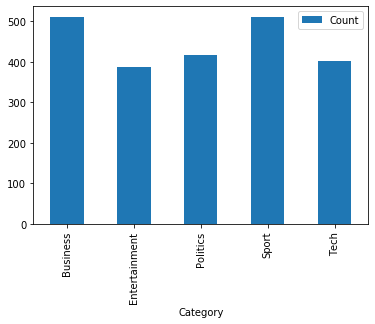

In [3]:
import matplotlib.pyplot as plt

count_data.plot(kind='bar', x = 'Category')

In [4]:
# creating data table of file name, contents, category
news_data = pd.DataFrame(columns=['File_Name', 'Contents', 'Category'])
for file in bus:
    with open("Business/"+file, mode='r') as reader:
        content = ""
        for line in reader.readlines():
            content=content+line
    addition = pd.DataFrame({'File_Name':file, 'Contents': [content], 'Category': 'Business'})
    news_data = pd.concat([news_data, addition], axis=0)
for file in ent:
    with open("Entertainment/"+file, mode='r') as reader:
        content = ""
        for line in reader.readlines():
            content=content+line
    addition = pd.DataFrame({'File_Name':file, 'Contents': [content], 'Category': 'Entertainment'})
    news_data = pd.concat([news_data, addition], axis=0)
for file in pol:
    with open("Politics/"+file, mode='r') as reader:
        content = ""
        for line in reader.readlines():
            content=content+line
    addition = pd.DataFrame({'File_Name':file, 'Contents': [content], 'Category': 'Politics'})
    news_data = pd.concat([news_data, addition], axis=0)
for file in sport:
    with open("Sport/"+file, mode='r') as reader:
        content = ""
        try: 
            for line in reader.readlines():
                content=content+line
            addition = pd.DataFrame({'File_Name':file, 'Contents': [content], 'Category': 'Sport'})
            news_data = pd.concat([news_data, addition], axis=0)
        except:
            continue
        
for file in tech:
    with open("Tech/"+file, mode='r') as reader:
        content = ""
        for line in reader.readlines():
            content=content+line
    addition = pd.DataFrame({'File_Name':file, 'Contents': [content], 'Category': 'Technology'})
    news_data = pd.concat([news_data, addition], axis=0)    

In [5]:
import re
news_data['Content'] = news_data[['Contents']].replace(to_replace="[\n|\r|\"|?|:|!|\.|,|;|']", value=' ', regex=True)
news_data.drop('Contents', inplace=True, axis=1)

In [6]:
news_data['Content'] = news_data['Content'].str.lower()
news_data.reset_index(inplace=True)
news_data.drop(['index'], inplace=True,axis=1)
news_data

,File_Name,Category,Content
0,010.txt,Business,court rejects $280bn tobacco case a us govern...
1,011.txt,Business,ask jeeves tips online ad revival ask jeeves ...
2,015.txt,Business,air passengers win new eu rights air passenge...
3,026.txt,Business,safety alert as gm recalls cars the world s b...
4,030.txt,Business,soaring oil hits world economy the soaring ...
...,...,...,...
2219,376.txt,Technology,t-mobile bets on pocket office t-mobile has...
2220,382.txt,Technology,tough rules for ringtone sellers firms that f...
2221,387.txt,Technology,progress on new internet domains by early 200...
2222,389.txt,Technology,mobile multimedia slow to catch on there is n...


In [7]:
pip install nltk

     |████████████████████████████████| 1.4MB 3.7MB/s eta 0:00:01
     |████████████████████████████████| 92kB 7.7MB/s eta 0:00:011
     |████████████████████████████████| 307kB 28.6MB/s eta 0:00:01
     |████████████████████████████████| 686kB 31.8MB/s eta 0:00:01
     |████████████████████████████████| 71kB 21.1MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/jupyterlab/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
## lemmatizing each word 
from nltk.stem import WordNetLemmatizer
# word and sent tokenizers 
from nltk.tokenize import sent_tokenize, word_tokenize

lemmatizer = WordNetLemmatizer()


wordnet_lemmatizer = WordNetLemmatizer()

nrows = news_data.shape[0]
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Save the text and its words into an object
    text_array = news_data.at[row,'Content']
    text_words = text_array.split()

    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [10]:
news_data['Lemma_Content'] = lemmatized_text_list
news_data.head()

,File_Name,Category,Content,Lemma_Content
0,010.txt,Business,court rejects $280bn tobacco case a us govern...,court reject $280bn tobacco case a us governme...
1,011.txt,Business,ask jeeves tips online ad revival ask jeeves ...,ask jeeves tip online ad revival ask jeeves ha...
2,015.txt,Business,air passengers win new eu rights air passenge...,air passengers win new eu right air passengers...
3,026.txt,Business,safety alert as gm recalls cars the world s b...,safety alert as gm recall cars the world s big...
4,030.txt,Business,soaring oil hits world economy the soaring ...,soar oil hit world economy the soar cost of oi...


In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords

stop_words = list(stopwords.words('english'))
n = news_data.shape[0]
Content = []
for i in range(0,n):
    entry_list = []
    text_list = news_data.at[i,'Lemma_Content']
    text_list = text_list.split(' ')  
    for w in text_list:
        if w not in stop_words:
            entry_list.append(w)
    s = " "
    entry_text = s.join(entry_list)
    Content.append(entry_text)

In [13]:
news_data['Content'] = Content

In [14]:
news_data.head()

,File_Name,Category,Content,Lemma_Content
0,010.txt,Business,court reject $280bn tobacco case us government...,court reject $280bn tobacco case a us governme...
1,011.txt,Business,ask jeeves tip online ad revival ask jeeves be...,ask jeeves tip online ad revival ask jeeves ha...
2,015.txt,Business,air passengers win new eu right air passengers...,air passengers win new eu right air passengers...
3,026.txt,Business,safety alert gm recall cars world biggest carm...,safety alert as gm recall cars the world s big...
4,030.txt,Business,soar oil hit world economy soar cost oil hit g...,soar oil hit world economy the soar cost of oi...


### Label Coding 

In [44]:
# categories dictionary
category_codes = {
    'Business': 0,
    'Entertainment': 1,
    'Politics': 2,
    'Sport': 3,
    'Technology': 4
}
news_data_original = news_data

In [45]:
news_data['Category_Code'] = news_data['Category']
news_data = news_data.replace({'Category_Code':category_codes})

In [47]:
#news_data.drop(['Lemma_Content'], axis=1, inplace=True)

In [48]:
news_data

,File_Name,Category,Content,Category_Code
0,010.txt,Business,court reject $280bn tobacco case us government...,0
1,011.txt,Business,ask jeeves tip online ad revival ask jeeves be...,0
2,015.txt,Business,air passengers win new eu right air passengers...,0
3,026.txt,Business,safety alert gm recall cars world biggest carm...,0
4,030.txt,Business,soar oil hit world economy soar cost oil hit g...,0
...,...,...,...,...
2219,376.txt,Technology,t-mobile bet pocket office t-mobile launch lat...,4
2220,382.txt,Technology,tough rule ringtone sellers firm flout rule ri...,4
2221,387.txt,Technology,progress new internet domains early 2005 net c...,4
2222,389.txt,Technology,mobile multimedia slow catch doubt mobile phon...,4


# Train - Test Split 

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(news_data['Content'], 
                                                    news_data['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)

### Text Representation 

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(1890, 300)
(334, 300)


In [51]:
print(tfidf.fit(X_train).vocabulary_)

{'hit': 121, 'media': 170, 'player': 209, 'phone': 205, 'game': 105, 'go': 109, 'price': 215, 'uk': 279, 'us': 281, 'europe': 81, 'next': 192, 'include': 128, 'great': 112, 'british': 38, 'face': 87, 'make': 163, 'lot': 161, 'want': 287, 'use': 282, 'play': 208, 'music': 183, 'take': 260, 'digital': 73, 'like': 151, 'mobile': 175, 'send': 241, 'mail': 162, 'service': 242, 'people': 204, 'pay': 203, 'also': 13, 'work': 294, 'system': 259, 'support': 258, 'mean': 169, 'london': 156, 'although': 14, 'list': 154, 'three': 270, 'name': 184, 'likely': 152, 'come': 54, 'cost': 60, 'far': 89, 'first': 96, 'two': 278, '000': 0, 'sell': 240, 'better': 30, 'european': 82, 'months': 178, 'later': 144, 'month': 177, 'expect': 86, 'could': 61, 'side': 246, 'former': 101, 'minister': 174, 'ireland': 135, 'announce': 15, 'long': 157, 'year': 297, 'old': 197, 'deal': 69, 'security': 238, 'future': 104, 'new': 190, 'create': 65, 'hold': 122, 'government': 111, 'leave': 148, 'become': 26, 'december': 70,

In [52]:
tfidf_matrix = pd.DataFrame(features_train, columns=tfidf.get_feature_names())
tfidf_matrix.head()

,000,10,12,2003,2004,2005,able,accord,act,action,...,week,well,win,without,work,world,would,year,year old,years
0,0.083760,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,...,0.0,0.000000,0.000000,0.0,0.076326,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.13694,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.070291,0.135187,0.000000
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,...,0.0,0.000000,0.122948,0.0,0.000000,0.000000,0.054789,0.000000,0.000000,0.000000
3,0.101258,0.0,0.129174,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,...,0.0,0.094337,0.000000,0.0,0.156228,0.000000,0.000000,0.065335,0.000000,0.000000
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.083359,0.076422,0.0,0.00000,...,0.0,0.000000,0.000000,0.0,0.060166,0.057208,0.043577,0.000000,0.000000,0.057208


In [53]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'Business' category:
  . Most correlated unigrams:
. economic
. economy
. oil
. growth
. bank
  . Most correlated bigrams:
. mr blair
. year old

# 'Entertainment' category:
  . Most correlated unigrams:
. best
. music
. star
. award
. film
  . Most correlated bigrams:
. mr blair
. prime minister

# 'Politics' category:
  . Most correlated unigrams:
. minister
. blair
. party
. election
. labour
  . Most correlated bigrams:
. prime minister
. mr blair

# 'Sport' category:
  . Most correlated unigrams:
. game
. club
. team
. cup
. match
  . Most correlated bigrams:
. say mr
. year old

# 'Technology' category:
  . Most correlated unigrams:
. microsoft
. technology
. computer
. software
. users
  . Most correlated bigrams:
. year old
. say mr



In [54]:
# pickling 
import pickle

# X_train
with open('Pickles/X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
with open('Pickles/X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
with open('Pickles/y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
with open('Pickles/y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)
    
# news_data
with open('Pickles/news_data.pickle', 'wb') as output:
    pickle.dump(news_data, output)
    
# features_train
with open('Pickles/features_train.pickle', 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
with open('Pickles/labels_train.pickle', 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
with open('Pickles/features_test.pickle', 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
with open('Pickles/labels_test.pickle', 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
with open('Pickles/tfidf.pickle', 'wb') as output:
    pickle.dump(tfidf, output)